This is a tutorial dedicated to showing me how to work with raster data - specifically, a digital elevation model (DEM) that's from Colorado.

I wanted to work with some digital elevation models (DEM) in order to figure out how to plot rasters and see if I can get certain parameters (e.g., resolution) from it.

Many, MANY thanks to the Earth Data Science tutorials for this. I'll plot this for some Ugandan DEMs when I get the chance.
https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/open-lidar-raster-python/

In [1]:
#Working with RASTER Data

import os
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
# A package created for this class that will be discussed later in this lesson
import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
import seaborn as sns
sns.set(font_scale=1.5, style="white")
# Get data and set wd
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [2]:
# Open raster data for the DEM, and then looking at the boundaries of the GeoTIFF
lidar_dem = rio.open(
    'data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')

lidar_dem.bounds #appears to be in a certain projection format, would need to investigate more

BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)

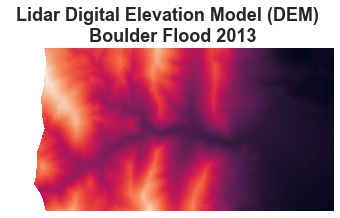

In [3]:
# Plot the dem using raster.io
fig, ax = plt.subplots(figsize = (8,3))
show(lidar_dem, 
     title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013", 
     ax=ax)
ax.set_axis_off()

In [4]:
# #As rasterio only opens/closes a connection, we have to close the connection to stop working with the data

# # Close the connection
# lidar_dem.close()
# # this returns an error as you have closed the connection to the file. 
# show(lidar_dem)

In [5]:
# # Open raster data connection - again
# lidar_dem = rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')

# fig, ax = plt.subplots(figsize = (8,3))
# show(lidar_dem, 
#      title="Once the connection is re-opened \nyou can work with the raster data", 
#      ax=ax)
# ax.set_axis_off()

## TUTORIAL ALSO MENTIONED SOME THINGS ABOUT SPECIFICALLY USING A CONTEXT MANAGER, but not necessary here (I think)

Now that I know how to use this feature, I'm going ahead and turn the raster into a numpy array for plotting.

In [6]:
# The below code is supposed to:
#     open the raster
#     create a spatial_extent object that contains the boundary information needed to plot your raster in space using rio.plot.plotting_extent
#     Read in the raster data itself into a numpy array using .read()

with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    # Convert / read the data into a numpy array:
    lidar_dem_im = src.read()
    # Create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)
    # Get bounds of object
    bounds = src.bounds

In [7]:
lidar_dem_im #we can now see that this is now read as an array

array([[[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6956300e+03,  1.6954199e+03,  1.6954299e+03],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6956000e+03,  1.6955399e+03,  1.6953600e+03],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6953800e+03,  1.6954399e+03,  1.6953700e+03],
        ...,
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6814500e+03,  1.6813900e+03,  1.6812500e+03],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6817200e+03,  1.6815699e+03,  1.6815599e+03],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6818900e+03,  1.6818099e+03,  1.6817400e+03]]], dtype=float32)

In [8]:
spatial_extent #see spatial extent of the object - should have the same params as lidar_dem.bounds

(472000.0, 476000.0, 4434000.0, 4436000.0)

In [9]:
bounds #again, same as lidar_dem.bounds

BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)

In [10]:
# Replotting the bounding box into the CORRECT format needed by MatPlotLib (left - bottom, right, top)

print("spatial extent:", spatial_extent)
# This is the format that rasterio provides with the bounds attribute
print("rasterio bounds:", bounds)

spatial extent: (472000.0, 476000.0, 4434000.0, 4436000.0)
rasterio bounds: BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)


In [11]:
#Read Files with Rasterio into Numpy

with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    # convert / read the data into a numpy array: masked= True turns `nodata` values to nan
    lidar_dem_im = src.read(1, masked=True)
    # create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)

print("object shape:", lidar_dem_im.shape)
print("object type:", type(lidar_dem_im))

object shape: (2000, 4000)
object type: <class 'numpy.ma.core.MaskedArray'>


In [12]:
#another way of reading in the data

with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    # Convert / read the data into a numpy array:
    lidar_dem_im2 = src.read(1)

with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    # Convert / read the data into a numpy array:
    lidar_dem_im3 = src.read()

print("Array Shape Using read(1):", lidar_dem_im2.shape)
# Notice that without the (1), your numpy array has a third dimension
print("Array Shape Using read():", lidar_dem_im3.shape)

Array Shape Using read(1): (2000, 4000)
Array Shape Using read(): (1, 2000, 4000)


Plotting a numpy array of the raster, using a grey color scheme

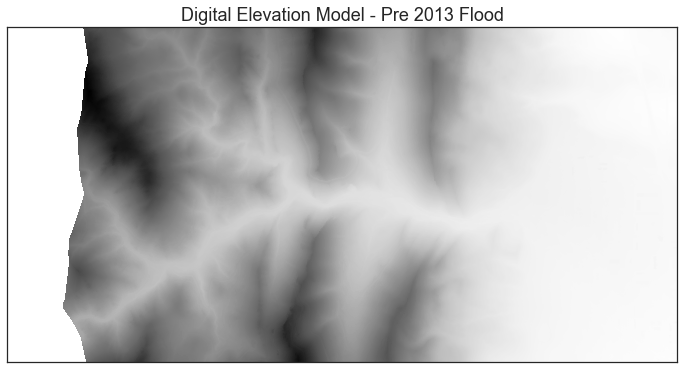

In [13]:
ep.plot_bands(lidar_dem_im,
              cmap='Greys',
              extent=spatial_extent,
              title="Digital Elevation Model - Pre 2013 Flood",
              cbar=False)

plt.show()

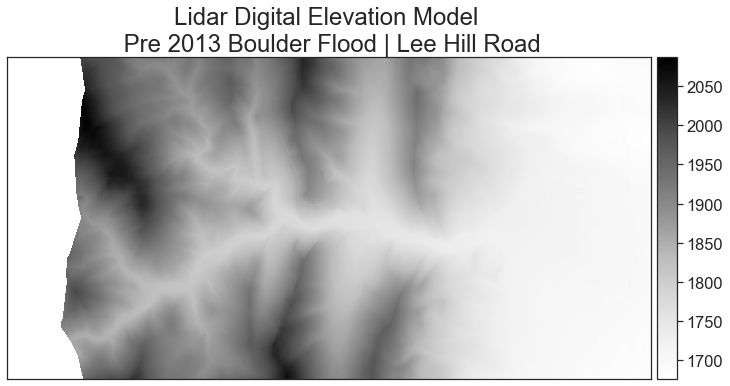

In [14]:
#similar plot, using both matplotlib and earthpy, to create an extra color bar and adding extra titles

fig, ax = plt.subplots(figsize=(12, 10))
ep.plot_bands(lidar_dem_im,
              cmap='Greys',
              extent=spatial_extent,
              scale=False,
              ax=ax)
ax.set_title("Lidar Digital Elevation Model \n Pre 2013 Boulder Flood | Lee Hill Road", fontsize=24)
plt.show()

#  Color Ramps
# To plot you can select pre-determined color ramps from matplotlib, you can reverse a color ramp by 
# adding _r at the end of the color ramps name, for example cmap = 'viridi

Creating a raster histogram to investigate the differences in elevation

In [15]:
lidar_dem_im #values in array

masked_array(
  data=[[--, --, --, ..., 1695.6300048828125, 1695.419921875,
         1695.429931640625],
        [--, --, --, ..., 1695.5999755859375, 1695.5399169921875,
         1695.3599853515625],
        [--, --, --, ..., 1695.3800048828125, 1695.43994140625,
         1695.3699951171875],
        ...,
        [--, --, --, ..., 1681.449951171875, 1681.3900146484375, 1681.25],
        [--, --, --, ..., 1681.719970703125, 1681.5699462890625,
         1681.5599365234375],
        [--, --, --, ..., 1681.8900146484375, 1681.8099365234375,
         1681.739990234375]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.4028235e+38,
  dtype=float32)

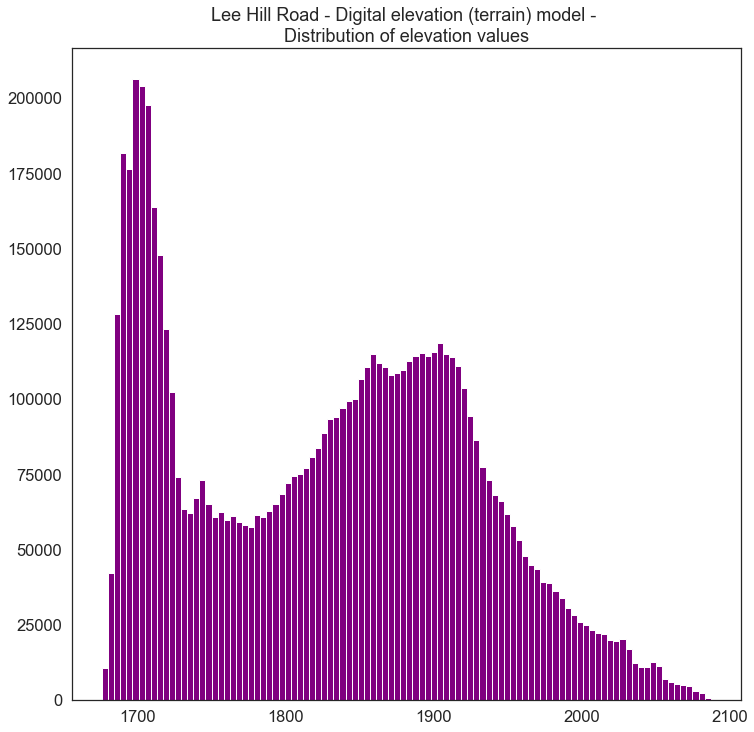

In [16]:
# Plotting the histogram

ep.hist(lidar_dem_im[~lidar_dem_im.mask].ravel(),
        bins=100,
        title="Lee Hill Road - Digital elevation (terrain) model - \nDistribution of elevation values")

plt.show()

We can see here that there are some differences in elevation. Most raster cells have values around 1,700 meters, but there are also many values that are between 1,800 - 1,950 meters tall.

Now, I'm adjusting the plotting extent, so that we can "zoom up" on the data. 

(This just means that we readjust the bounding box of the raster, and plot a smaller area. This way, we can see more detail on some of the cells.)

In [17]:
# Define a spatial extent that is "smaller" - so that this is what we're zooming up on in the final product.
# minx, miny, maxx, maxy, ccw=True
zoomed_extent = [472500, 4434000, 473030, 4435030]

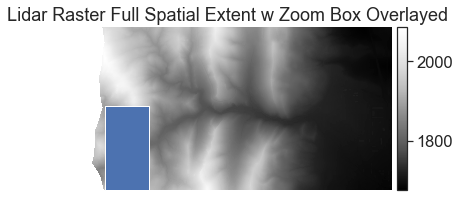

In [18]:
# Now, I'm adding a 'bounding box' that fits the same zoomed extent, on the original raster graphic, 
# so it looks like we're forcing the bounding box on top of the raster.

zoom_ext_gdf = gpd.GeoDataFrame()
zoom_ext_gdf.loc[0, 'geometry'] = box(*zoomed_extent)

# Plot the original data with the boundary box
fig, ax = plt.subplots(figsize=(8, 3))
ep.plot_bands(lidar_dem_im,
              extent=spatial_extent,
              title="Lidar Raster Full Spatial Extent w Zoom Box Overlayed",
              ax=ax,
              scale=False)
zoom_ext_gdf.plot(ax=ax)

ax.set_axis_off()

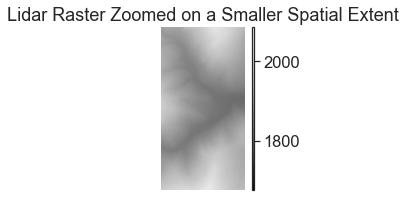

In [19]:
# Below, we're plotting the data on this smaller extent shown above -- but need to set the x and y lim

fig, ax = plt.subplots(figsize=(8, 3))
ep.plot_bands(lidar_dem_im,
              extent=spatial_extent,
              title="Lidar Raster Zoomed on a Smaller Spatial Extent",
              ax=ax,
              scale=False)
# Set x and y limits of the plot
ax.set_xlim(zoomed_extent[0], zoomed_extent[2])
ax.set_ylim(zoomed_extent[1], zoomed_extent[3])
ax.set_axis_off()

plt.show()

In [20]:
# Getting raster metadata about this raster

# 1. Coordinate Reference System (CRS)

# View crs of raster imported with rasterio
with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    print(src.crs)

EPSG:32613


EPSG: 32613 lines up to the Universal Transverse Mercator (UTM) 13N zone. While, based on previous work, I know that this is in meters, I want to show this in Python.

In [21]:
# Each key of the dictionary is an EPSG code
print(list(et.epsg.keys())[:10])
['29188', '26733', '24600', '32189', '4899', '29189', '26734', '7402', '26951', '29190']

# You can convert to proj4 like so:
proj4 = et.epsg['32613']
print(proj4)

# Finally you can convert this into a rasterio CRS like so:
crs_proj4 = rio.crs.CRS.from_string(proj4)
crs_proj4

['29188', '26733', '24600', '32189', '4899', '29189', '26734', '7402', '26951', '29190']
+proj=utm +zone=13 +datum=WGS84 +units=m +no_defs


CRS.from_dict(init='epsg:32613')

We see that, based on the Proj4 string shown above (the thing that starts with "+proj="): this is a DEM in UTM 13N, with units in meters.

In [22]:
# I'm not looking at bounding boxes (again), since we did that in the first part of the exercise.

# However, I'm now going to look at the raster resolution, usually shown in (x [meters], y [meters]).

src.res #should show (1.0, 1.0) - indicating a resolution of 1 m x 1 m

(1.0, 1.0)

I'm going to do a few things about subtracting and exporting GeoTIFFs in Python, which is something I want to do to convert this DEM into an REM (relative elevation model)...

The tutorial will be in https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/subtract-rasters-in-python/.